In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
pip install plotly

   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ------ --------------------------------- 2.6/16.3 MB 12.5 MB/s eta 0:00:02
   ---------- ----------------------------- 4.5/16.3 MB 11.7 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/16.3 MB 8.9 MB/s eta 0:00:02
   ------------- -------------------------- 5.5/16.3 MB 6.4 MB/s eta 0:00:02
   -------------- ------------------------- 6.0/16.3 MB 6.0 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.3 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 7.3/16.3 MB 5.3 MB/s eta 0:00:02
   ------------------- -------------------- 8.1/16.3 MB 4.8 MB/s eta 0:00:02
   --------------------- ------------------ 8.9/16.3 MB 4.7 MB/s eta 0:00:02
   ----------------------- ---------------- 9.7/16.3 MB 4.8 MB/s eta 0:00:02
   -------------------------- ------------- 10.7/16.3 MB 4.7 MB/s eta 0:00:02
   ---------------------------- ----------- 11.5/16.3 MB 4.6 MB/s eta 0:00:02
  

In [2]:
from scipy.stats import ttest_ind, chi2_contingency, pearsonr

In [3]:
df = pd.read_csv('../../Data/Raw/data_1_leaps/BankChurners.csv')

In [4]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4044,721388283,Existing Customer,54,M,2,Post-Graduate,Single,$120K +,Blue,45,...,1,4,5597.0,0,5597.0,0.596,4844,58,0.871,0.000
9835,716151858,Existing Customer,46,M,3,Unknown,Single,$80K - $120K,Blue,36,...,1,3,12932.0,1893,11039.0,0.804,15372,97,0.796,0.146
7371,718641483,Existing Customer,53,F,3,Graduate,Married,Less than $40K,Blue,42,...,1,1,2404.0,1109,1295.0,0.639,4519,72,0.636,0.461
3872,717096858,Existing Customer,51,M,2,Doctorate,Single,$40K - $60K,Blue,40,...,3,3,6492.0,719,5773.0,0.711,4828,78,0.529,0.111
1256,787685658,Existing Customer,43,M,2,High School,Divorced,$80K - $120K,Blue,33,...,3,2,3083.0,1898,1185.0,1.042,1448,30,2.000,0.616
3446,789744033,Existing Customer,50,M,2,Graduate,Single,$80K - $120K,Blue,38,...,1,1,19999.0,1007,18992.0,0.987,3183,69,0.500,0.050
4394,719583558,Existing Customer,49,F,3,Uneducated,Married,$40K - $60K,Blue,40,...,2,3,8900.0,1700,7200.0,0.906,4710,70,0.556,0.191
6175,716559108,Existing Customer,47,F,1,High School,Single,Less than $40K,Blue,36,...,2,3,2899.0,2418,481.0,0.575,4296,68,0.838,0.834
6314,788694558,Existing Customer,53,F,3,Uneducated,Single,Less than $40K,Blue,40,...,2,3,1438.3,661,777.3,0.573,4463,87,0.812,0.460
1052,720650208,Existing Customer,40,F,3,College,Unknown,$40K - $60K,Blue,22,...,3,3,12588.0,2005,10583.0,0.996,1561,26,1.000,0.159


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


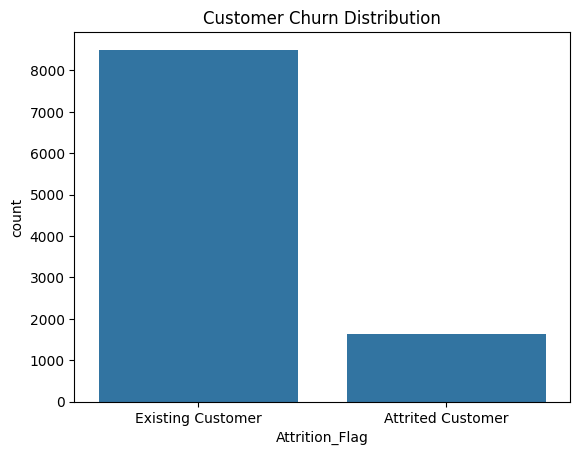

In [9]:
sns.countplot(data=df, x='Attrition_Flag')
plt.title("Customer Churn Distribution")
plt.show()

In [10]:
df['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [11]:
# dropping client IDs 
df = df.drop(['CLIENTNUM'], axis=1, errors='ignore')

In [12]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [13]:
#DESCRIPTIVE STATISTICS FOR CATEGORICAL COLUMNS
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts(), "\n")

Attrition_Flag: 2 unique values
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 

Gender: 2 unique values
Gender
F    5358
M    4769
Name: count, dtype: int64 

Education_Level: 7 unique values
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 

Marital_Status: 4 unique values
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 

Income_Category: 6 unique values
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 

Card_Category: 4 unique values
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 



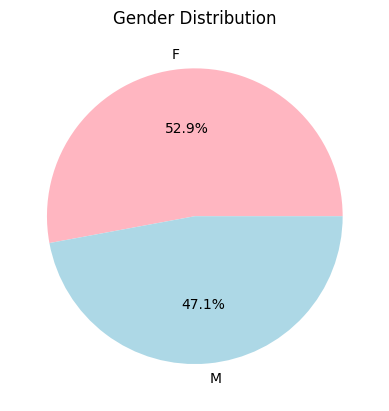

In [14]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightpink', 'lightblue'], title='Gender Distribution')
plt.ylabel('') 
plt.show()

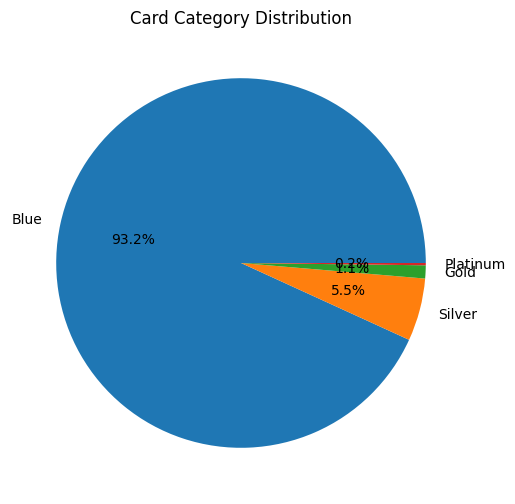

In [15]:
df['Card_Category'].value_counts().plot.pie(autopct='%1.1f%%', title='Card Category Distribution', figsize=(6, 6))
plt.ylabel('')
plt.show()


There are gaps in the dataset(unknown values)->in Education_Level and Income_Category

Genders are uniformly distributed even though there are more number of females compared to males

In [17]:
df.duplicated().sum()

np.int64(0)

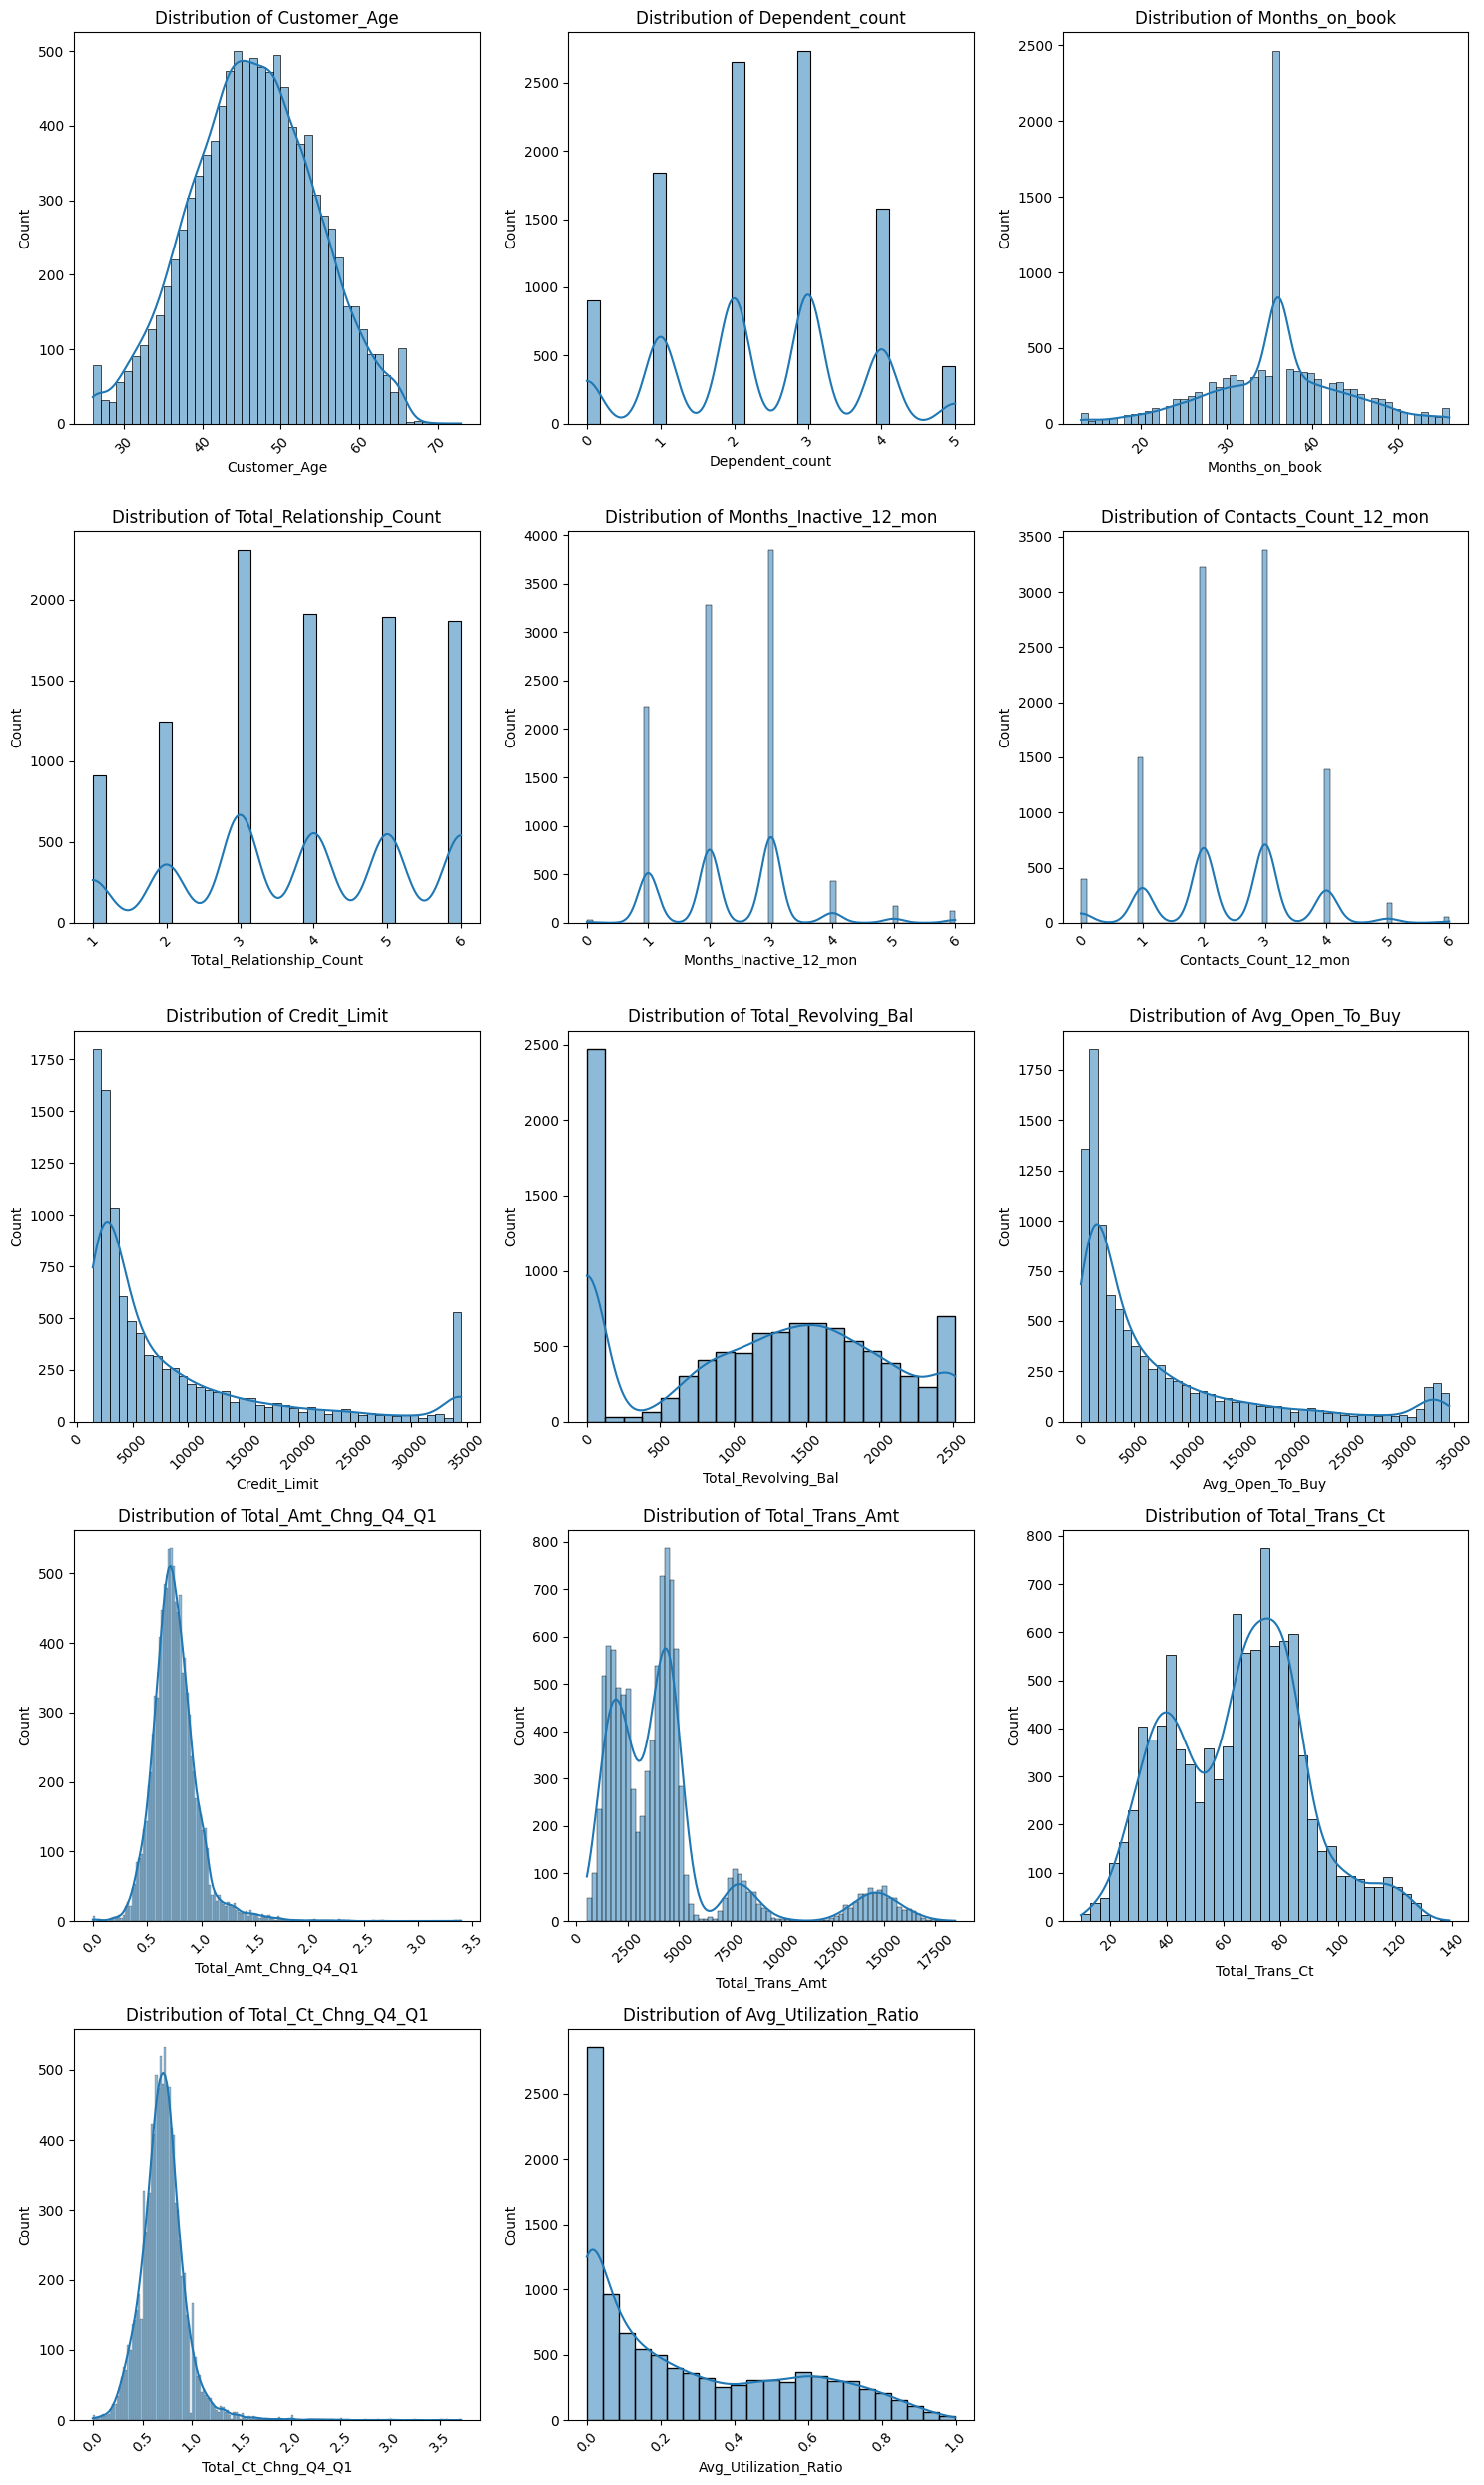

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

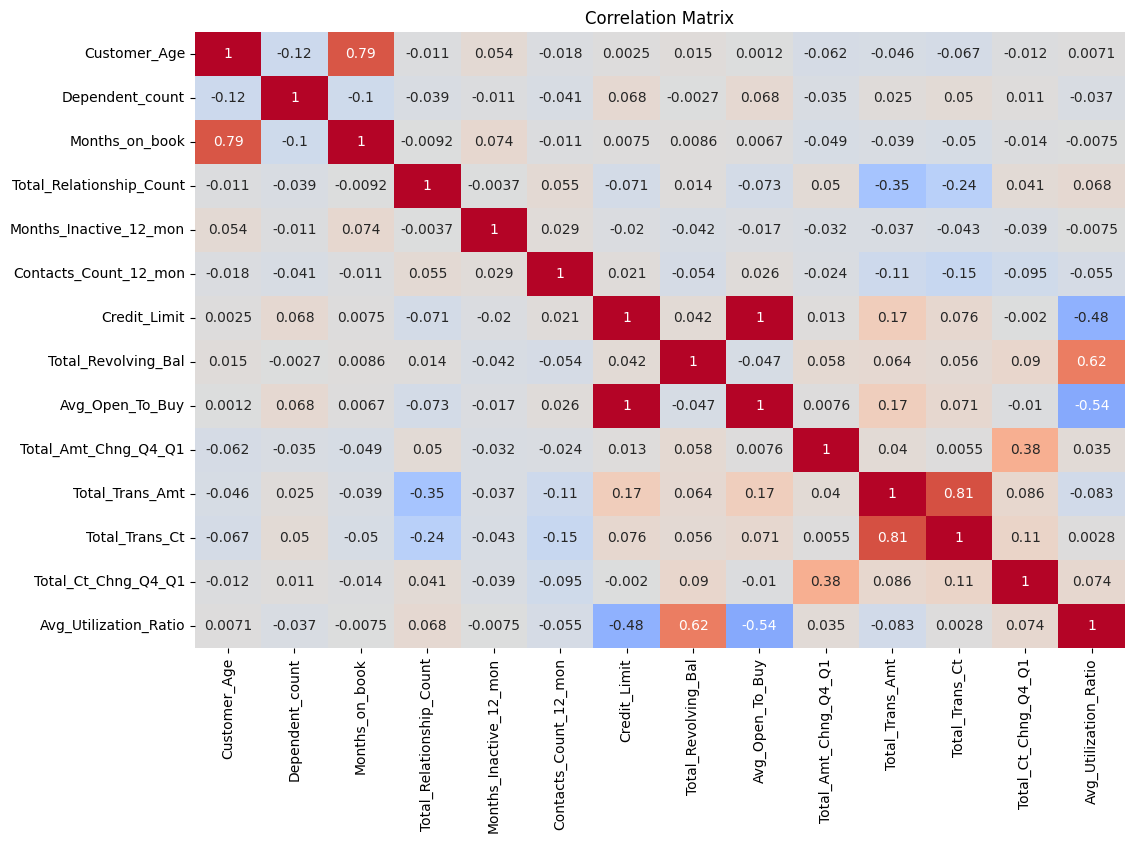

In [19]:
# Correlation matrix.... 
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,cbar=False)
plt.title('Correlation Matrix')
plt.show()

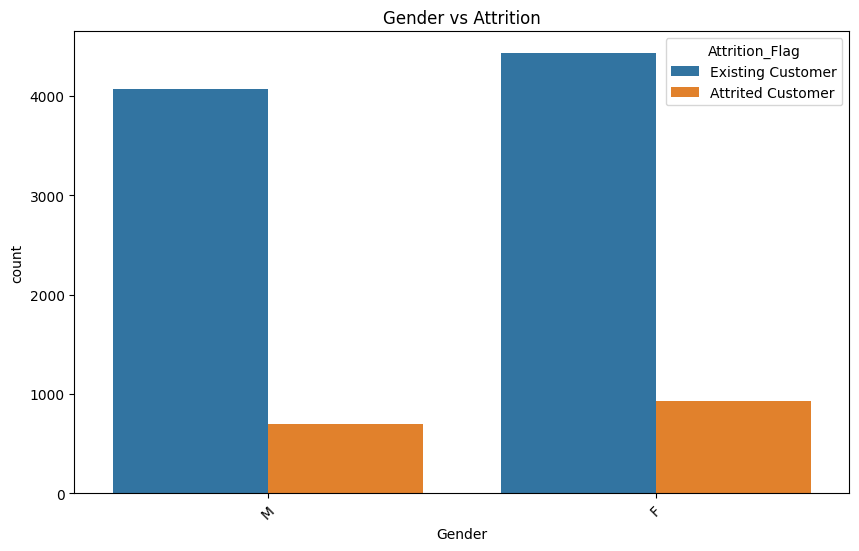

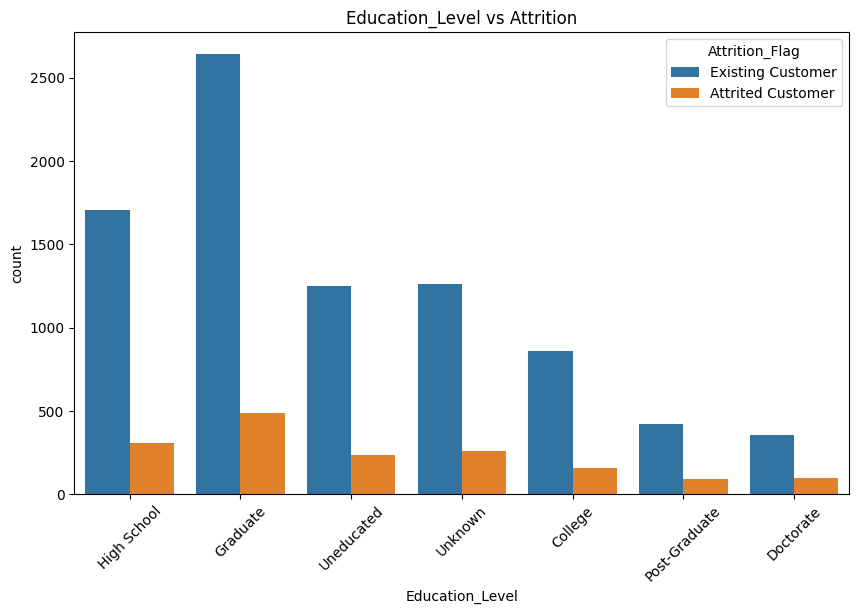

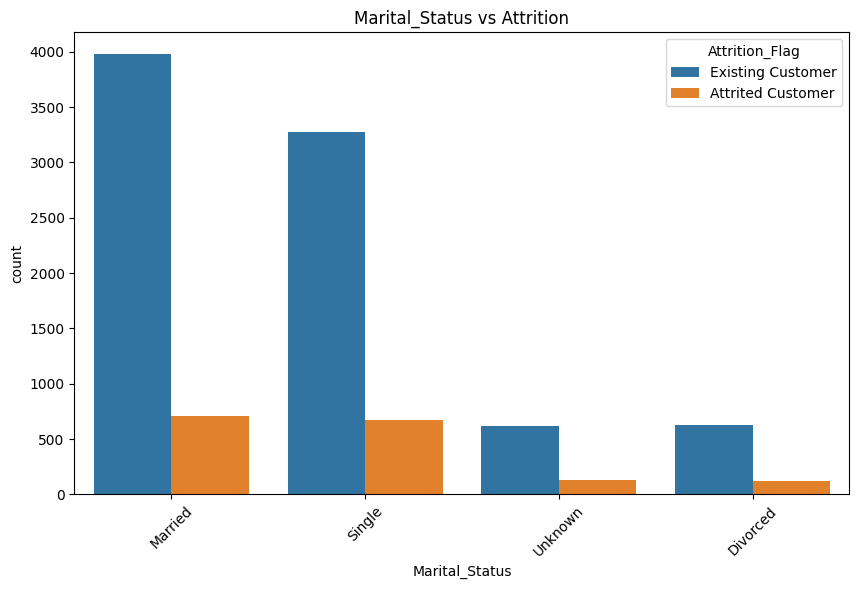

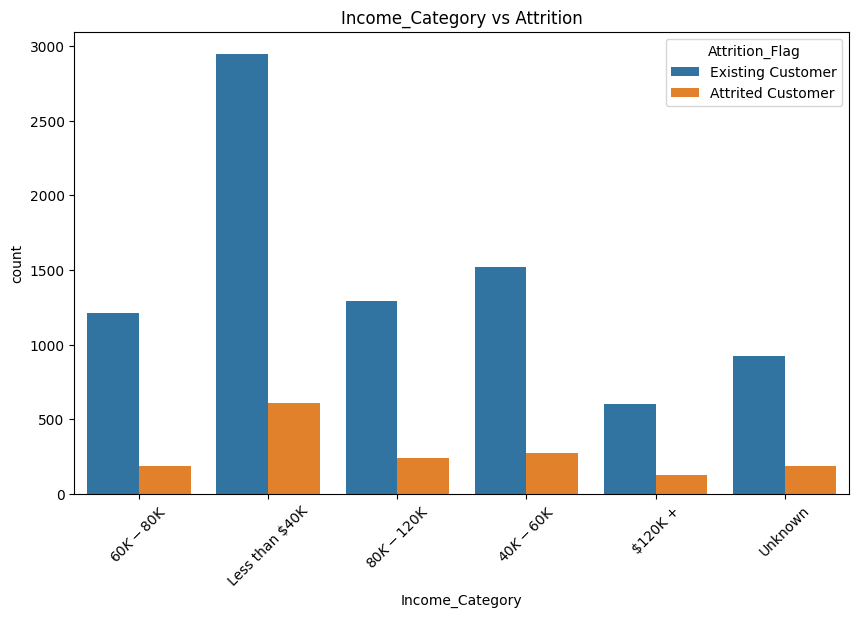

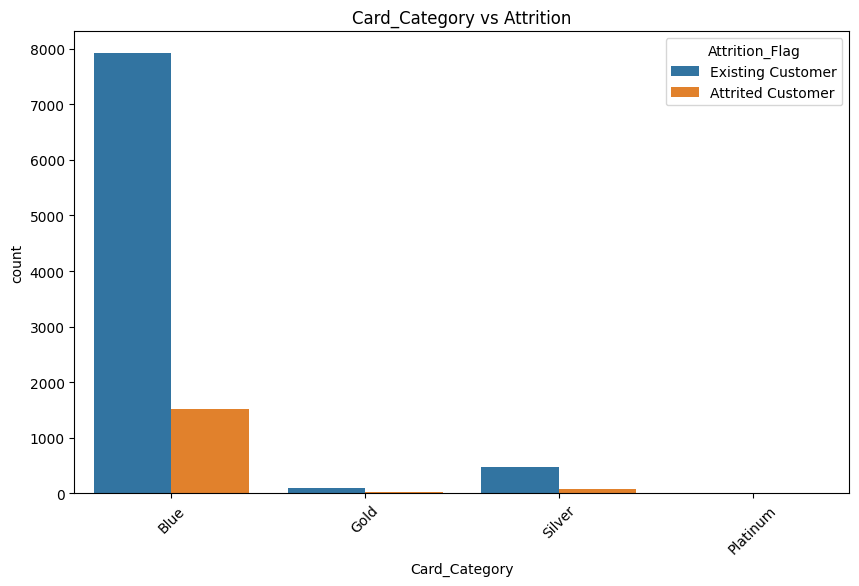

In [20]:
%matplotlib inline

categorical_columns = df.select_dtypes(include=['object']).columns
if 'Attrition_Flag' in df.columns:
    for col in categorical_columns:
        if col != 'Attrition_Flag':
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=col, hue='Attrition_Flag')
            plt.title(f'{col} vs Attrition')
            plt.xticks(rotation=45)
            plt.show()

In [21]:
if 'Attrition_Flag' in df.columns:
    churn_rate = df['Attrition_Flag'].value_counts(normalize=True) * 100
    print("\nChurn Rate:")
    display(churn_rate)


Churn Rate:


Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64

->Descriptive Statistics: summarizes and describes the characteristics of the dataset
->Inferential Statistics: analysing the sample data and drawing conclusions regarding the population

DESCRIPTIVE STATISTICS ABOUT THE DATASET
1.mean
2.median
3.mode
4.standard deviation
5.Variance
6.Range
7.InterQuartile Range

In [22]:
mean=df.mean(numeric_only=True)

In [23]:
mean

Customer_Age                  46.325960
Dependent_count                2.346203
Months_on_book                35.928409
Total_Relationship_Count       3.812580
Months_Inactive_12_mon         2.341167
Contacts_Count_12_mon          2.455317
Credit_Limit                8631.953698
Total_Revolving_Bal         1162.814061
Avg_Open_To_Buy             7469.139637
Total_Amt_Chng_Q4_Q1           0.759941
Total_Trans_Amt             4404.086304
Total_Trans_Ct                64.858695
Total_Ct_Chng_Q4_Q1            0.712222
Avg_Utilization_Ratio          0.274894
dtype: float64

In [24]:
median = df.median(numeric_only=True)
median

Customer_Age                  46.000
Dependent_count                2.000
Months_on_book                36.000
Total_Relationship_Count       4.000
Months_Inactive_12_mon         2.000
Contacts_Count_12_mon          2.000
Credit_Limit                4549.000
Total_Revolving_Bal         1276.000
Avg_Open_To_Buy             3474.000
Total_Amt_Chng_Q4_Q1           0.736
Total_Trans_Amt             3899.000
Total_Trans_Ct                67.000
Total_Ct_Chng_Q4_Q1            0.702
Avg_Utilization_Ratio          0.176
dtype: float64

In [25]:
mode=df.mode().iloc[0]
mode

Attrition_Flag              Existing Customer
Customer_Age                             44.0
Gender                                      F
Dependent_count                           3.0
Education_Level                      Graduate
Marital_Status                        Married
Income_Category                Less than $40K
Card_Category                            Blue
Months_on_book                           36.0
Total_Relationship_Count                  3.0
Months_Inactive_12_mon                    3.0
Contacts_Count_12_mon                     3.0
Credit_Limit                          34516.0
Total_Revolving_Bal                       0.0
Avg_Open_To_Buy                        1438.3
Total_Amt_Chng_Q4_Q1                    0.791
Total_Trans_Amt                          4253
Total_Trans_Ct                           81.0
Total_Ct_Chng_Q4_Q1                     0.667
Avg_Utilization_Ratio                     0.0
Name: 0, dtype: object

In [26]:
std=df.std(numeric_only=True)
std

Customer_Age                   8.016814
Dependent_count                1.298908
Months_on_book                 7.986416
Total_Relationship_Count       1.554408
Months_Inactive_12_mon         1.010622
Contacts_Count_12_mon          1.106225
Credit_Limit                9088.776650
Total_Revolving_Bal          814.987335
Avg_Open_To_Buy             9090.685324
Total_Amt_Chng_Q4_Q1           0.219207
Total_Trans_Amt             3397.129254
Total_Trans_Ct                23.472570
Total_Ct_Chng_Q4_Q1            0.238086
Avg_Utilization_Ratio          0.275691
dtype: float64

In [27]:
var=df.var(numeric_only=True)
var

Customer_Age                6.426931e+01
Dependent_count             1.687163e+00
Months_on_book              6.378285e+01
Total_Relationship_Count    2.416184e+00
Months_Inactive_12_mon      1.021358e+00
Contacts_Count_12_mon       1.223734e+00
Credit_Limit                8.260586e+07
Total_Revolving_Bal         6.642044e+05
Avg_Open_To_Buy             8.264056e+07
Total_Amt_Chng_Q4_Q1        4.805161e-02
Total_Trans_Amt             1.154049e+07
Total_Trans_Ct              5.509616e+02
Total_Ct_Chng_Q4_Q1         5.668499e-02
Avg_Utilization_Ratio       7.600579e-02
dtype: float64

In [28]:
_range=df.max(numeric_only=True)-df.min(numeric_only=True)
_range

Customer_Age                   47.000
Dependent_count                 5.000
Months_on_book                 43.000
Total_Relationship_Count        5.000
Months_Inactive_12_mon          6.000
Contacts_Count_12_mon           6.000
Credit_Limit                33077.700
Total_Revolving_Bal          2517.000
Avg_Open_To_Buy             34513.000
Total_Amt_Chng_Q4_Q1            3.397
Total_Trans_Amt             17974.000
Total_Trans_Ct                129.000
Total_Ct_Chng_Q4_Q1             3.714
Avg_Utilization_Ratio           0.999
dtype: float64

In [29]:
iqr = df.select_dtypes(include='number').quantile(0.75) - df.select_dtypes(include='number').quantile(0.25)
iqr

Customer_Age                  11.000
Dependent_count                2.000
Months_on_book                 9.000
Total_Relationship_Count       2.000
Months_Inactive_12_mon         1.000
Contacts_Count_12_mon          1.000
Credit_Limit                8512.500
Total_Revolving_Bal         1425.000
Avg_Open_To_Buy             8534.500
Total_Amt_Chng_Q4_Q1           0.228
Total_Trans_Amt             2585.500
Total_Trans_Ct                36.000
Total_Ct_Chng_Q4_Q1            0.236
Avg_Utilization_Ratio          0.480
dtype: float64

Credit Limit and Avg_Open_To_Buy are heavily skewed.....a subset possesses very high limits->which might influence overall financial metrics

In [30]:
# churned = df[df['Attrition_Flag'] == 'Attrited Customer']['Avg_Utilization_Ratio']
# retained = df[df['Attrition_Flag'] == 'Existing Customer']['Avg_Utilization_Ratio']
# t_stat, p_val_util = ttest_ind(churned, retained)

In [31]:
# contingency = pd.crosstab(df['Gender'], df['Attrition_Flag'])
# chi2, p_val_gender, _, _ = chi2_contingency(contingency)

In [32]:
# corr_credit_trans, p_val_corr = pearsonr(df['Credit_Limit'], df['Total_Trans_Amt'])

In [59]:
# mean_cl = df['Credit_Limit'].mean()
# std_cl = df['Credit_Limit'].std()
# n = df.shape[0]
# ci_lower = mean_cl - 1.96 * (std_cl / n**0.5)
# ci_upper = mean_cl + 1.96 * (std_cl / n**0.5)

Inferential statistics

In [48]:
from scipy import stats

age_credit_corr = df['Customer_Age'].corr(df['Credit_Limit'])
age_credit_pvalue = stats.pearsonr(df['Customer_Age'], df['Credit_Limit'])[1]

attrited_credit = df[df['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit']
existing_credit = df[df['Attrition_Flag'] == 'Existing Customer']['Credit_Limit']
credit_ttest = stats.ttest_ind(attrited_credit, existing_credit)

education_card = pd.crosstab(df['Education_Level'], df['Card_Category'])
chi2, p_value, dof, expected = chi2_contingency(education_card)

income_groups = [group for _, group in df.groupby('Income_Category')['Total_Trans_Amt']]
f_stat, p_value_anova = stats.f_oneway(*income_groups)

df['Churn'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
util_churn_corr = df['Avg_Utilization_Ratio'].corr(df['Churn'])
util_churn_pvalue = stats.pearsonr(df['Avg_Utilization_Ratio'], df['Churn'])[1]

attrited_inactive = df[df['Attrition_Flag'] == 'Attrited Customer']['Months_Inactive_12_mon']
existing_inactive = df[df['Attrition_Flag'] == 'Existing Customer']['Months_Inactive_12_mon']
mannwhitney = stats.mannwhitneyu(attrited_inactive, existing_inactive)

relationship_trans_corr = df['Total_Relationship_Count'].corr(df['Total_Trans_Amt'])
relationship_trans_pvalue = stats.pearsonr(df['Total_Relationship_Count'], df['Total_Trans_Amt'])[1]

marital_churn = pd.crosstab(df['Marital_Status'], df['Attrition_Flag'])
chi2_marital, p_value_marital, dof_marital, expected_marital = chi2_contingency(marital_churn)

df['Gender_Binary'] = (df['Gender'] == 'M').astype(int)
gender_credit_corr = stats.pointbiserialr(df['Gender_Binary'], df['Credit_Limit'])

card_groups = [group for _, group in df.groupby('Card_Category')['Total_Trans_Amt']]
h_stat, p_value_kw = stats.kruskal(*card_groups)

In [49]:
print("\n1. Correlation between Age and Credit Limit:")
print(f"Correlation: {age_credit_corr:.3f}")
print(f"P-value: {age_credit_pvalue:.3f}")


1. Correlation between Age and Credit Limit:
Correlation: 0.002
P-value: 0.803


Age does not significantly affect the credit limit offered

In [50]:
print("\n2. T-test for Credit Limit difference between Attrited and Existing Customers:")
print(f"T-statistic: {credit_ttest.statistic:.3f}")
print(f"P-value: {credit_ttest.pvalue:.3f}")
print(f"P-value: {p_value_kw:.3f}")


2. T-test for Credit Limit difference between Attrited and Existing Customers:
T-statistic: -2.403
P-value: 0.016
P-value: 0.000


The difference in credit limits between churned and retained customers is statistically significant. Customers with low credit value have higher churn risk

In [51]:
print("\n3. Chi-square test for Education Level and Card Category:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p_value:.3f}")


3. Chi-square test for Education Level and Card Category:
Chi-square statistic: 17.629
P-value: 0.480


Educational background doesn’t influence card preference....any related marketing might not yield better results than earlier

In [52]:
print("\n4. ANOVA test for Transaction Amount across Income Categories:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value_anova:.3f}")


4. ANOVA test for Transaction Amount across Income Categories:
F-statistic: 0.805
P-value: 0.546


Transaction activity is not income-level driven

In [53]:
print("\n5. Correlation between Utilization Ratio and Churn:")
print(f"Correlation: {util_churn_corr:.3f}")
print(f"P-value: {util_churn_pvalue:.3f}")


5. Correlation between Utilization Ratio and Churn:
Correlation: -0.178
P-value: 0.000


customers with lower utilization ratios tend to churn more

In [54]:
print("\n6.U test for Months Inactive:")
print(f"U-statistic: {mannwhitney.statistic:.3f}")
print(f"P-value: {mannwhitney.pvalue:.3f}")


6.U test for Months Inactive:
U-statistic: 8687418.000
P-value: 0.000


Inactivity levels are significantly differet between churned and retained customers

In [55]:
print("\n7. Correlation between Relationship Count and Transaction Amount:")
print(f"Correlation: {relationship_trans_corr:.3f}")
print(f"P-value: {relationship_trans_pvalue:.3f}")


7. Correlation between Relationship Count and Transaction Amount:
Correlation: -0.347
P-value: 0.000


as customers avail more products from the bank, their individual transaction amounts tend to be lower

In [56]:
print("\n8. Chi-square test for Marital Status and Churn:")
print(f"Chi-square statistic: {chi2_marital:.3f}")
print(f"P-value: {p_value_marital:.3f}")


8. Chi-square test for Marital Status and Churn:
Chi-square statistic: 6.056
P-value: 0.109


No statistically significant link between marital status and churn.

In [57]:
print("\n9.Correlation between Gender and Credit Limit:")
print(f"Correlation: {gender_credit_corr.correlation:.3f}")
print(f"P-value: {gender_credit_corr.pvalue:.3f}")


9.Correlation between Gender and Credit Limit:
Correlation: 0.421
P-value: 0.000


gender-based and non-biased marketing might be effective as there is a moderate correlation between gender and credit-limit

In [58]:
print("\n10.H-test for Transaction Amount across Card Categories:")
print(f"H-statistic: {h_stat:.3f}")
print(f"P-value: {p_value_kw:.3f}")


10.H-test for Transaction Amount across Card Categories:
H-statistic: 175.177
P-value: 0.000


Transaction behavior varies significantly across card types-Premium cardholders transact more

actionable insights for Business persons:
1.(Groups in the data)The bank serves two broadly different customer profiles. The bulk of the customers fall into a lower-limit, standard (Blue) category. However, a smaller, but influential, group possesses significantly higher credit limits, pulling the average up. These high-limit customers likely represent higher value (higher risk) and belong to premium card categories.
2.Churn is linked to credit limits, inactivity, and utilization	Adjust credit policies and monitor low activity as churn risks
3.Card category influences transaction amount.Promote upgrades or benefits based on usage tiers and eligible customers into higher groups.
4.education, marital status don’t explain much behavior. Behavioral based segmentation is much needed instead of demographic based segmentation to understand churn probability even bettr
5.More relationships!=more usage.Shift from breadth to depth in customer engagement.

EDA-ITER-2

ANALYSING ONE ATTRIBUTE AT A TIME

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import numpy as np

In [4]:
data = pd.read_csv('../../Data/Raw/data_1_leaps/BankChurners.csv')

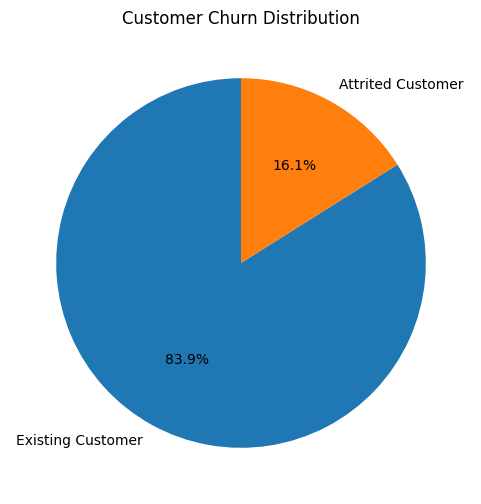

In [5]:
plt.figure(figsize=(6, 6))
data['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.ylabel('')
plt.show()

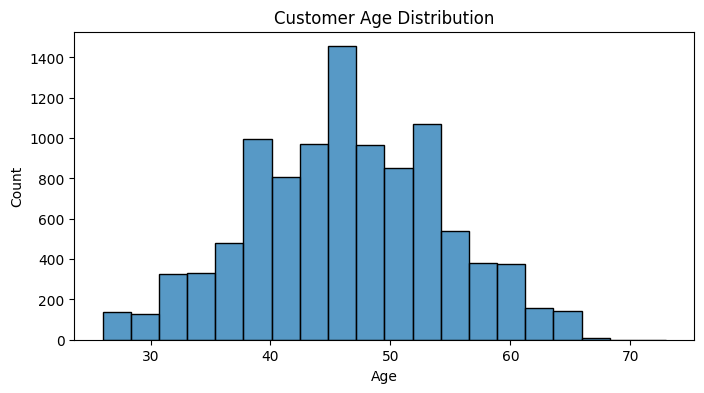

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Customer_Age'], bins=20, kde=False)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

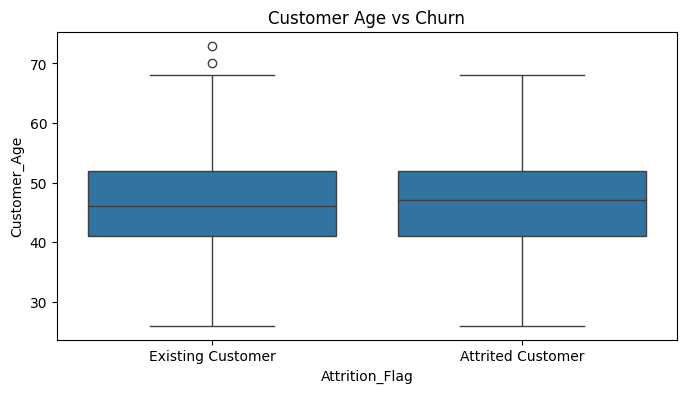

In [7]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=data)
plt.title('Customer Age vs Churn')
plt.show()

The age is normally distributed. There is no clear difference between the age distribution.

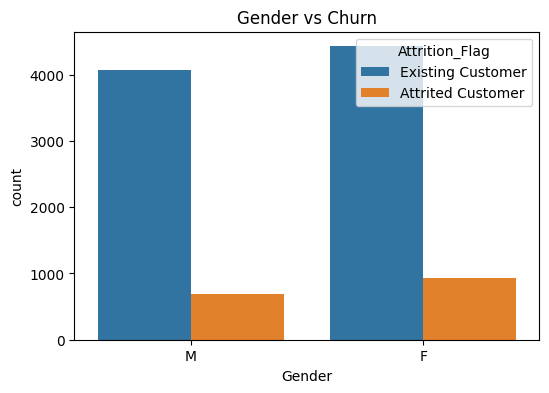

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Attrition_Flag', data=data)
plt.title('Gender vs Churn')
plt.show()

The difference is too small to say that one gender is more eager to churn.

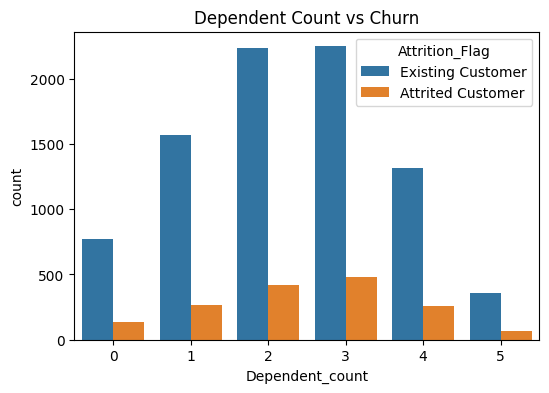

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Dependent_count', hue='Attrition_Flag', data=data)
plt.title('Dependent Count vs Churn')
plt.show()

In [11]:
churned = data[data['Attrition_Flag'] == "Attrited Customer"]
nonchurned = data[data['Attrition_Flag'] == "Existing Customer"]

In [12]:
churned['Dependent_count'].describe()

count    1627.000000
mean        2.402581
std         1.275010
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Dependent_count, dtype: float64

In [13]:
nonchurned['Dependent_count'].describe()

count    8500.000000
mean        2.335412
std         1.303229
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Dependent_count, dtype: float64

The dependent count shows us a normal distribution. No clear shift is visible when comparing the churned- and non churned distribution.

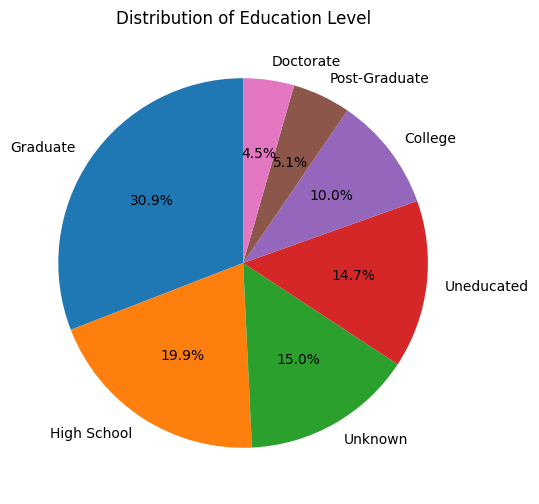

In [14]:
plt.figure(figsize=(6, 6))
data['Education_Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Education Level')
plt.ylabel('')
plt.show()

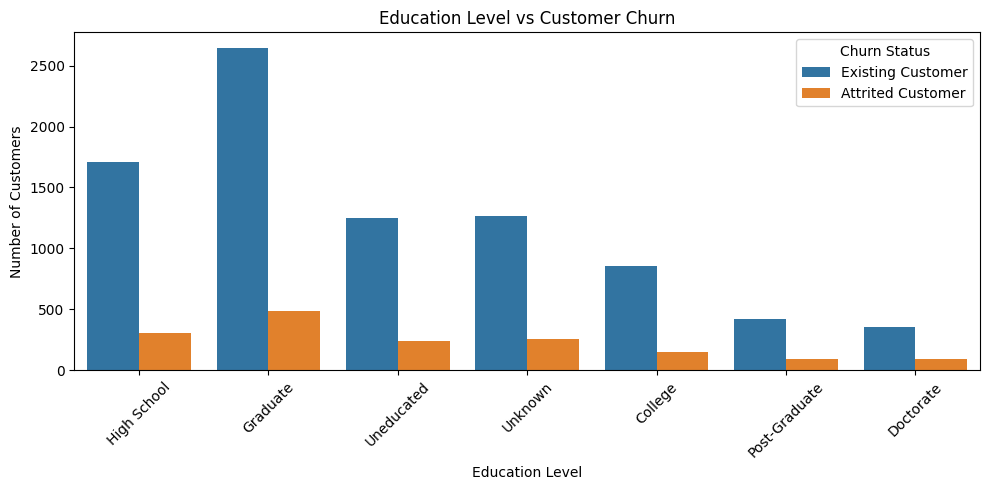

In [15]:
# Bar plot comparing education level between churned and non-churned customers
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Education_Level', hue='Attrition_Flag')
plt.title('Education Level vs Customer Churn')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

The "Education level" - distribution of the churn/nonchurned customers shows no difference.

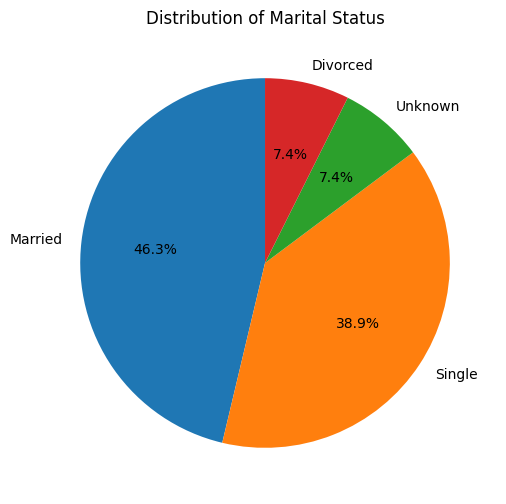

In [16]:
# Pie chart showing distribution of marital status
plt.figure(figsize=(6, 6))
data['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.ylabel('')
plt.show()

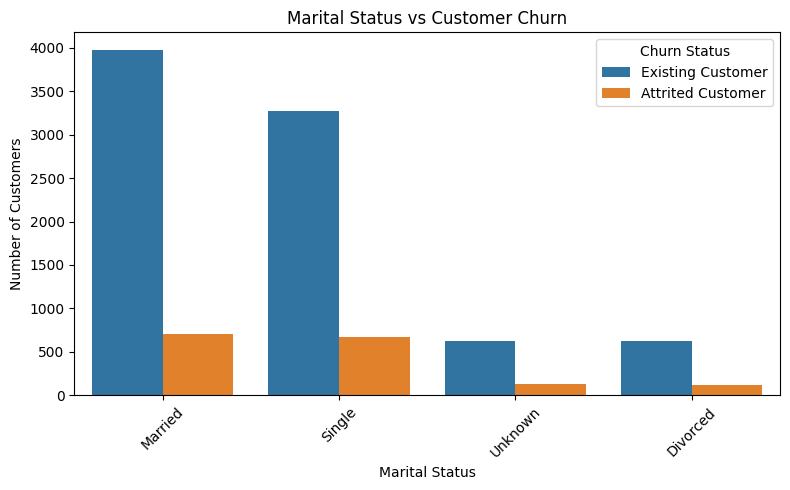

In [17]:
# Bar plot comparing marital status between churned and non-churned customers
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Marital_Status', hue='Attrition_Flag')
plt.title('Marital Status vs Customer Churn')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The main part of the population is married. Both churn and non churned have the same distribution.

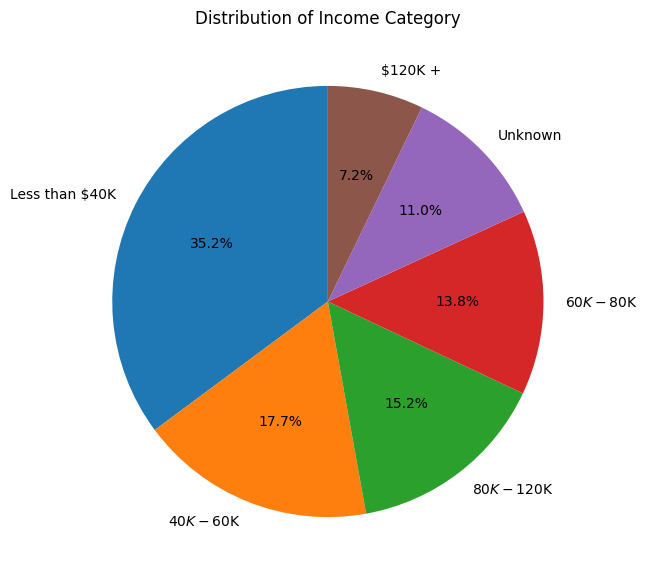

In [18]:
# Pie chart showing distribution of income categories
plt.figure(figsize=(7, 7))
data['Income_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Income Category')
plt.ylabel('')
plt.show()

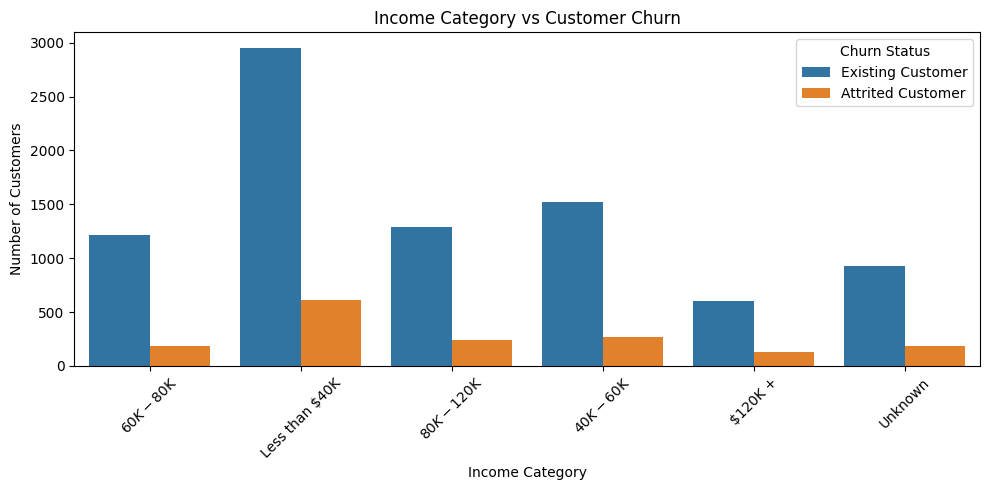

In [19]:
# Bar plot comparing income category between churned and non-churned customers
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Income_Category', hue='Attrition_Flag')
plt.title('Income Category vs Customer Churn')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()


larget amount of the customers earns less then $40k a year. Like the other demographic variables no clear shift in the distributions can be noticed.

In [20]:
def plot_pie(column):
    target = data[column].value_counts()    
    fig1, ax1 = plt.subplots()    
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()
def plot_compare(column, category_name):
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())
    
    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()
    
    indchurned = np.arange(NChurned)    # the x locations for the groups
    indnonchurned = np.arange(NNonChurned)    
    width = 1       # the width of the bars: can also be len(x) sequence
    
    figs, axs = plt.subplots(1,2, figsize=(12,5))
    
    axs[1].bar(indchurned, ChurnedCounts, width, color='#DD8452')
    axs[1].set_title('Churned ' + category_name, fontsize=20)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45)
    
    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='b')
    axs[0].set_title('Non Churned ' + category_name, fontsize=20)
    axs[0].set_ylabel('Amount of People')
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45)
    
    
    plt.show()

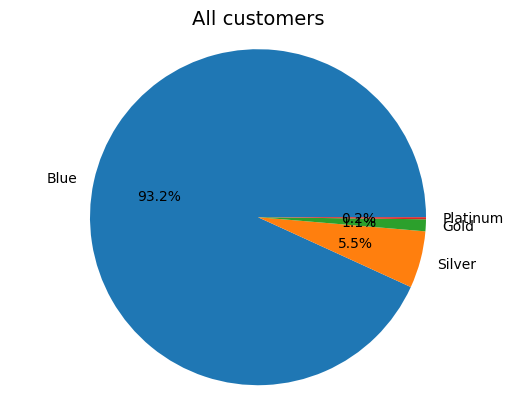

In [21]:
plot_pie("Card_Category")

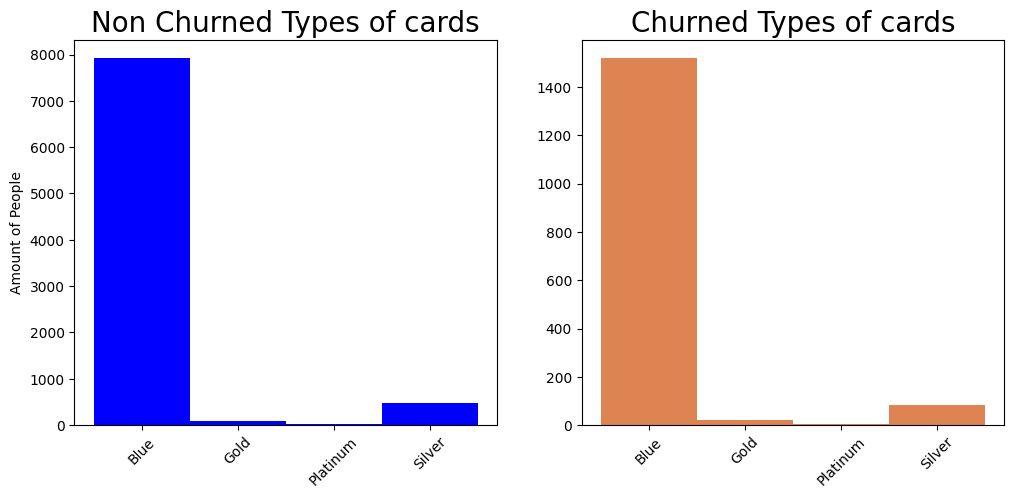

In [24]:
plot_compare("Card_Category", "Types of cards")

most of the customers have the "Blue" card. The distribution of churned/not churned is the same.

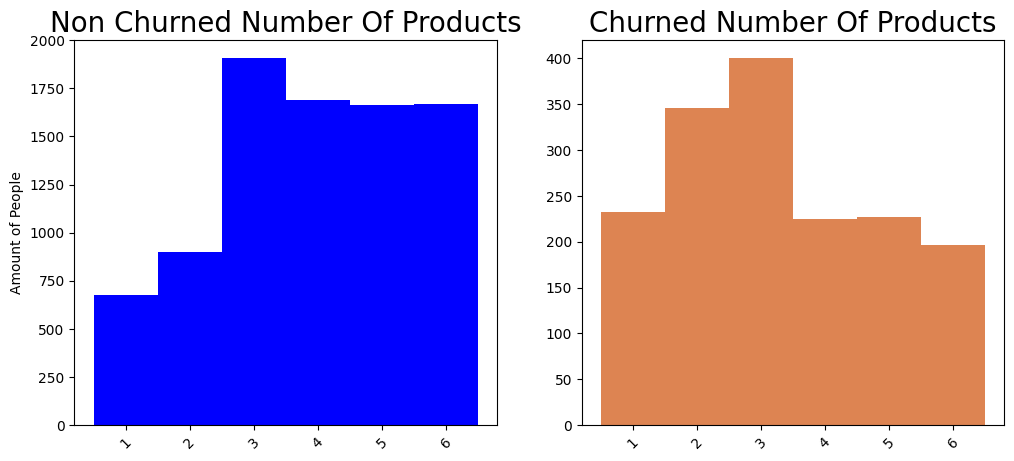

In [25]:
plot_compare("Total_Relationship_Count", "Number Of Products")

non churned customers tend to buy more products then the churned customers.

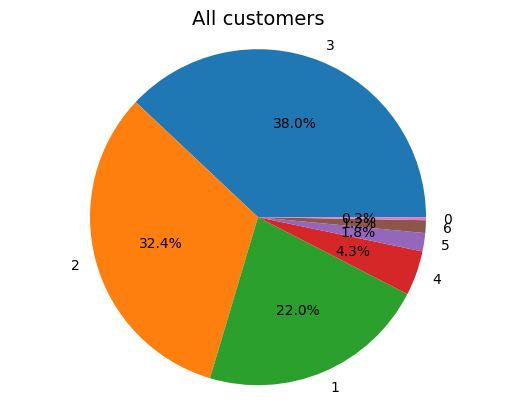

In [28]:
#Months inactive vs churn
plot_pie("Months_Inactive_12_mon")

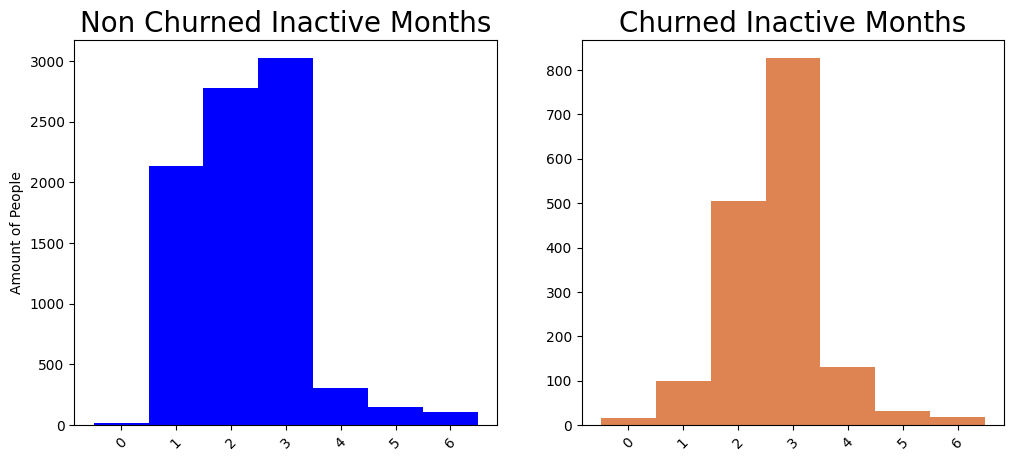

In [29]:
plot_compare("Months_Inactive_12_mon", "Inactive Months")

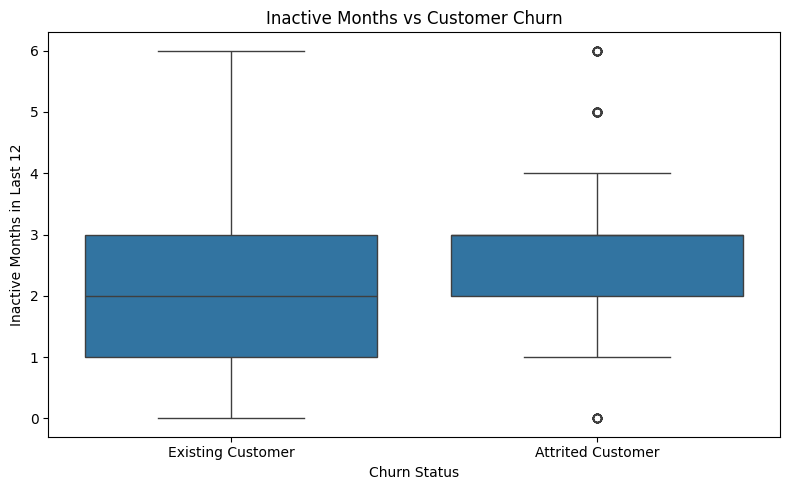

In [30]:
# Boxplot showing inactivity in the last 12 months vs churn status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=data)
plt.title('Inactive Months vs Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Inactive Months in Last 12')
plt.tight_layout()
plt.show()

It's clear that the most of the customers show a 3 month inactivity. It can be said that most of the active members (less then 3 months) can be found within the non churning customers.

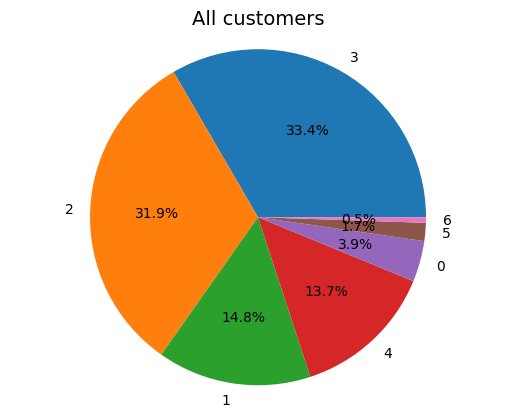

In [31]:
#No.of contacts vs churn
plot_pie("Contacts_Count_12_mon")

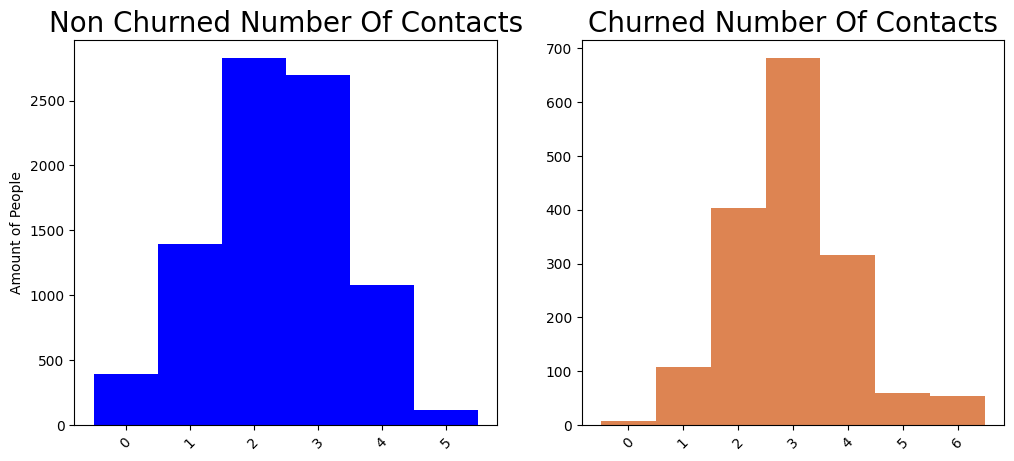

In [32]:
plot_compare("Contacts_Count_12_mon", "Number Of Contacts")

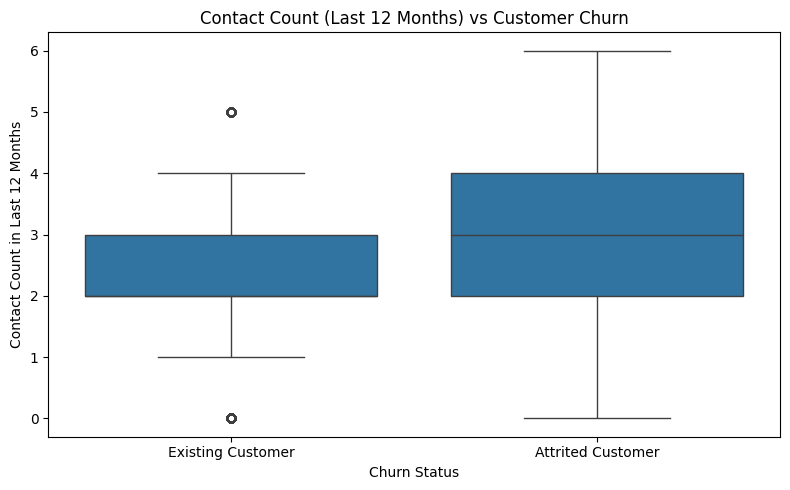

In [33]:
# Boxplot showing contact frequency vs churn status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=data)
plt.title('Contact Count (Last 12 Months) vs Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Contact Count in Last 12 Months')
plt.tight_layout()
plt.show()

Churned customers are most likely to have more contact then the non churned customers. All though the difference isn't large it's still noticable. 

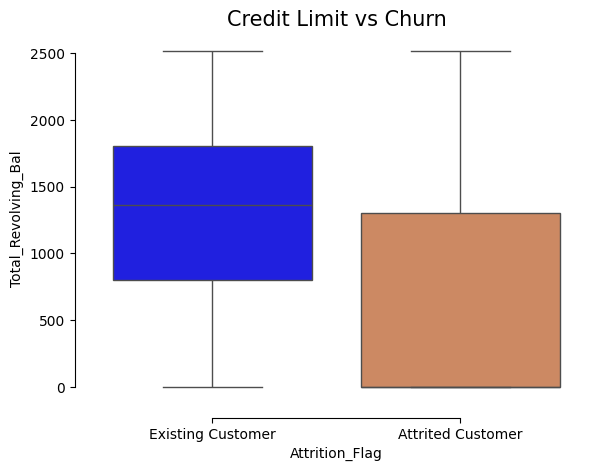

In [34]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Credit Limit vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

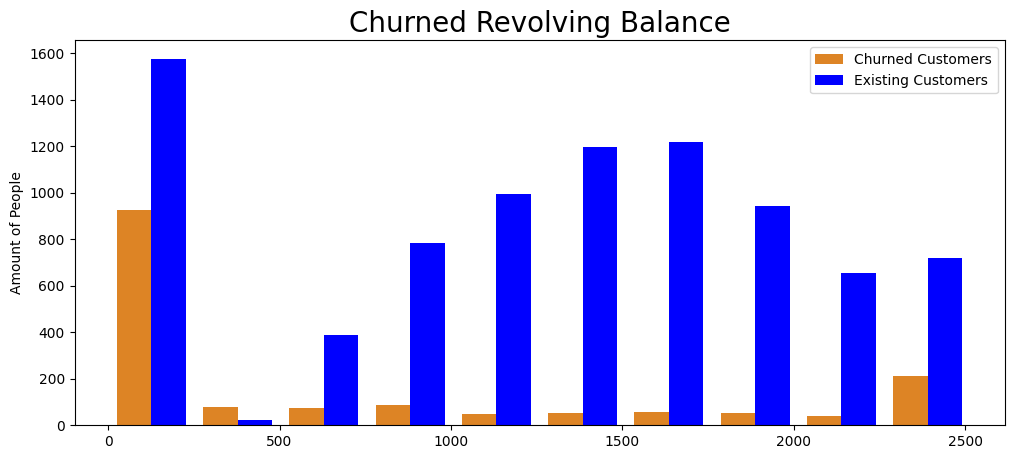

In [35]:
column = "Total_Revolving_Bal"
category_name = "Revolving Balance" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425', 'b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

It's clear that the churned customers have a lower revolving balance then the existing customers.

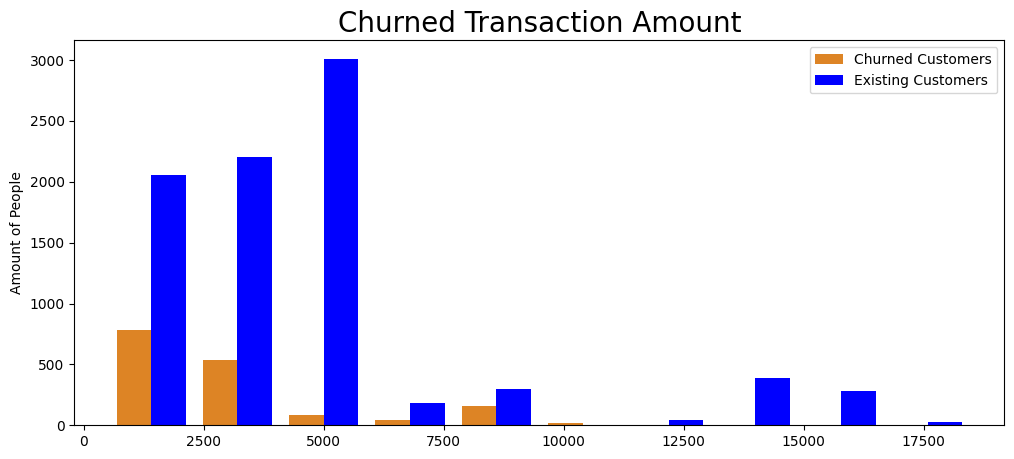

In [36]:
column = "Total_Trans_Amt"
category_name = "Transaction Amount" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

It's clear that the transaction amount is lower for the churned customers compared to the existing customers.

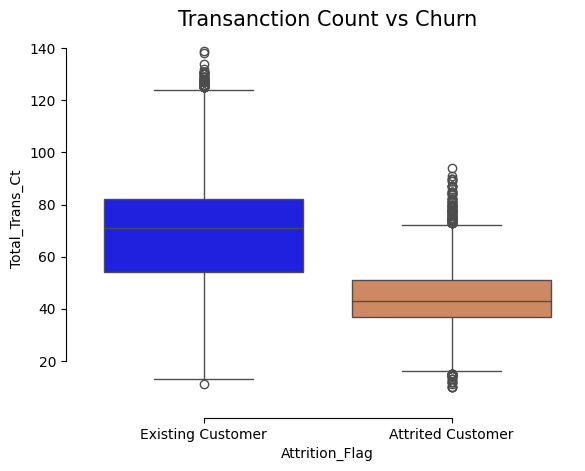

In [37]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Transanction Count vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

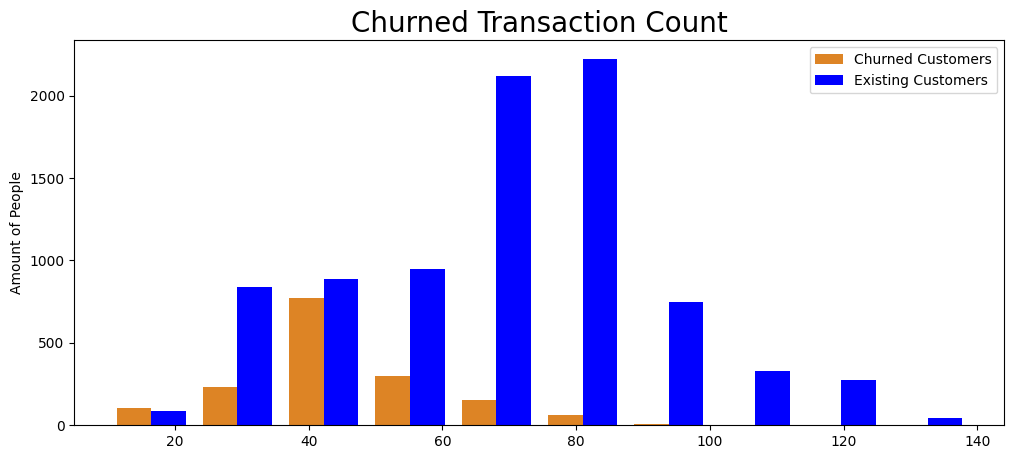

In [38]:
column = "Total_Trans_Ct"
category_name = "Transaction Count" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

It's clear that churned customers mostly have a lower transaction count then the existing customers.

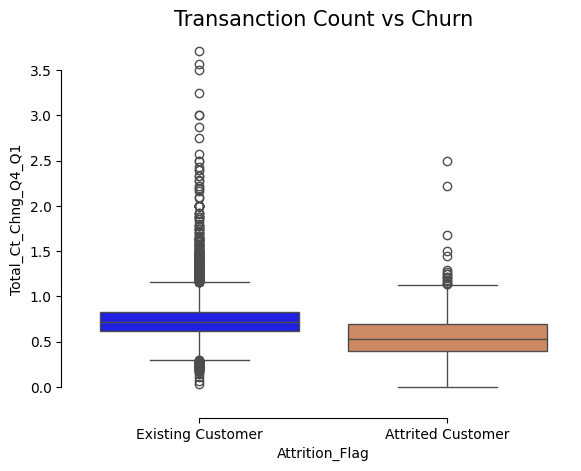

In [39]:
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Transanction Count vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

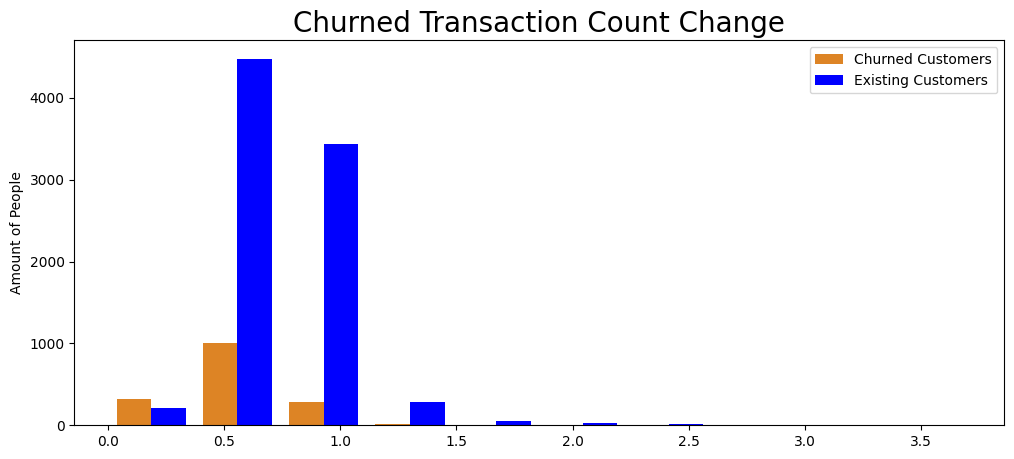

In [40]:
column = "Total_Ct_Chng_Q4_Q1"
category_name = "Transaction Count Change" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

The average count is higher for the existing customers.

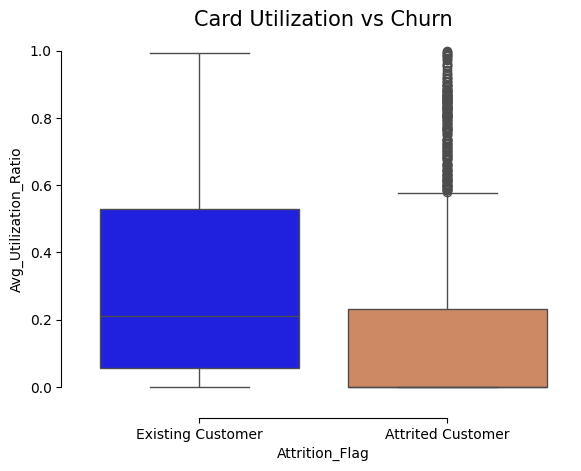

In [41]:
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Card Utilization vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

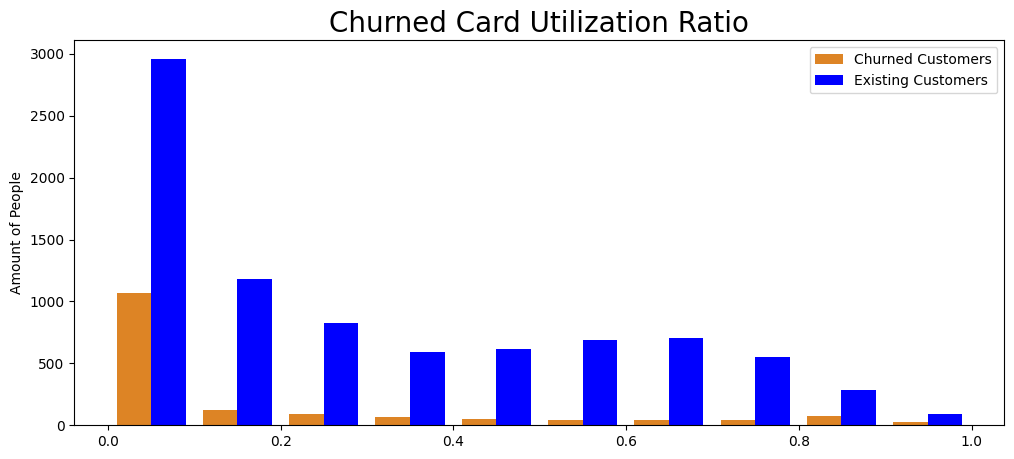

In [42]:
column = "Avg_Utilization_Ratio"
category_name = "Card Utilization Ratio" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

It's clear that the average card utilization ratio is higher for the existing customers.

ANALYSING MUTIPLE ATTRIBUTES TOGETHER

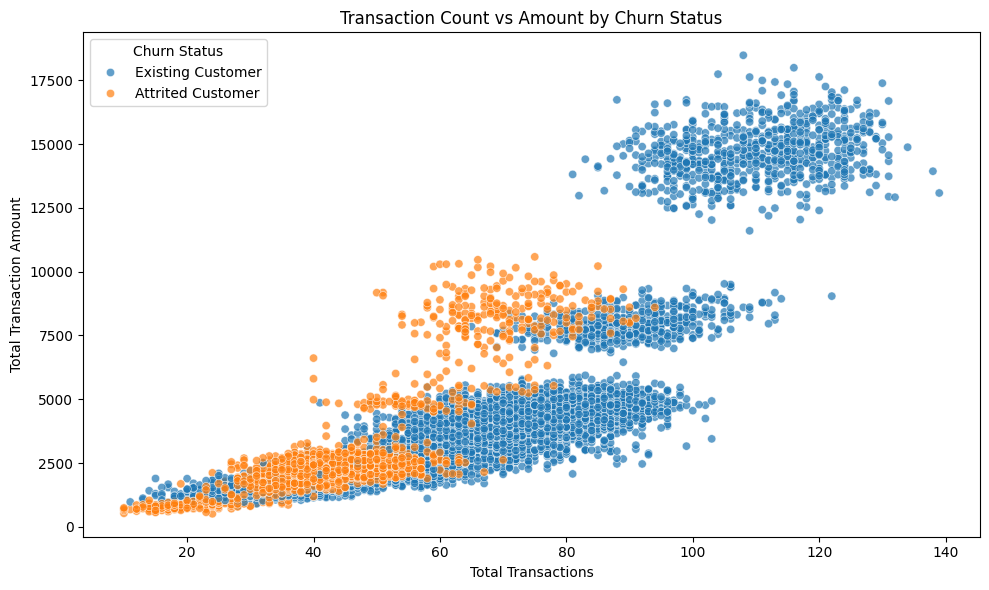

In [45]:
# Scatter plot comparing transaction count and amount, colored by churn status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total_Trans_Ct', y='Total_Trans_Amt',
                hue='Attrition_Flag', alpha=0.7)
plt.title('Transaction Count vs Amount by Churn Status')
plt.xlabel('Total Transactions')
plt.ylabel('Total Transaction Amount')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()


Customers with fewer and smaller transactions are more likely to churn. This suggests that transaction activity is a strong predictor of churn behavior

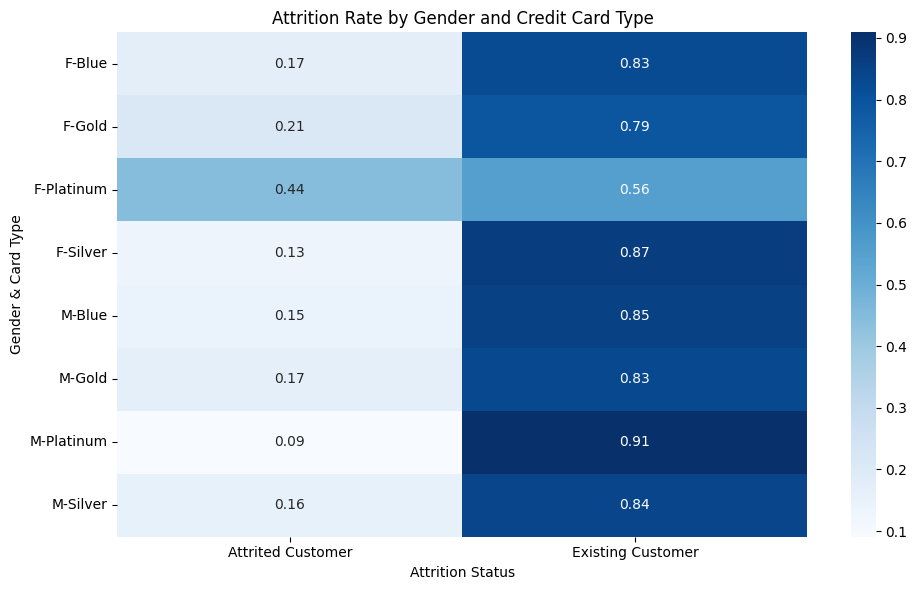

In [49]:
cross_tab = pd.crosstab(index=[data['Gender'], data['Card_Category']], 
                        columns=data['Attrition_Flag'], normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('Attrition Rate by Gender and Credit Card Type')
plt.ylabel('Gender & Card Type')
plt.xlabel('Attrition Status')
plt.tight_layout()
plt.show()

Males generally have lower attrition rates than females across all card types.

F-Platinum customers have the highest attrition rate (44%).

M-Platinum customers have the lowest attrition rate (9%).

→ Suggests that female Platinum users are more likely to churn, possibly due to unmet expectations or dissatisfaction with high-tier service.

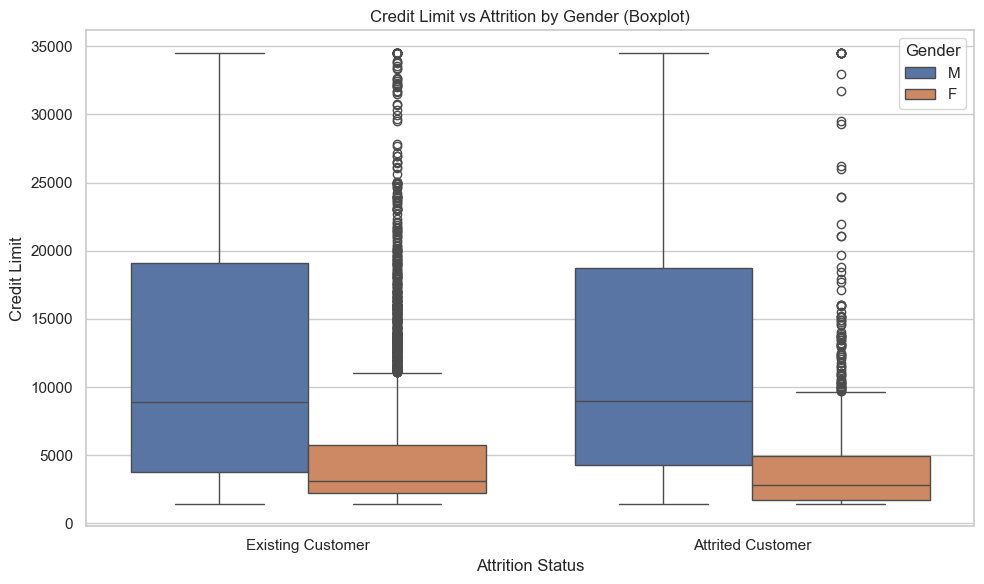

In [51]:
# Set plot style
sns.set(style="whitegrid")

# Boxplot: Credit Limit vs Attrition by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition_Flag', y='Credit_Limit', hue='Gender')
plt.title('Credit Limit vs Attrition by Gender (Boxplot)')
plt.ylabel('Credit Limit')
plt.xlabel('Attrition Status')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [53]:
# Group summary
group_summary = data.groupby(['Attrition_Flag', 'Gender'])['Credit_Limit'].describe()
print(group_summary)


                           count          mean           std     min      25%  \
Attrition_Flag    Gender                                                        
Attrited Customer F        930.0   4515.497527   5029.448016  1438.3  1735.50   
                  M        697.0  12966.891679  10890.977226  1438.3  4259.00   
Existing Customer F       4428.0   5130.622967   5291.757644  1438.3  2240.75   
                  M       4072.0  12637.539391  10606.393424  1438.3  3735.00   

                             50%       75%      max  
Attrition_Flag    Gender                             
Attrited Customer F       2810.0   4916.00  34516.0  
                  M       8958.0  18734.00  34516.0  
Existing Customer F       3102.5   5774.50  34516.0  
                  M       8884.0  19075.75  34516.0  


Low credit limit females are more prone to attrition, as indicated by the leftward shift in the median and tighter IQR.

For males, attrition appears independent of credit limit — medians are very close between groups.

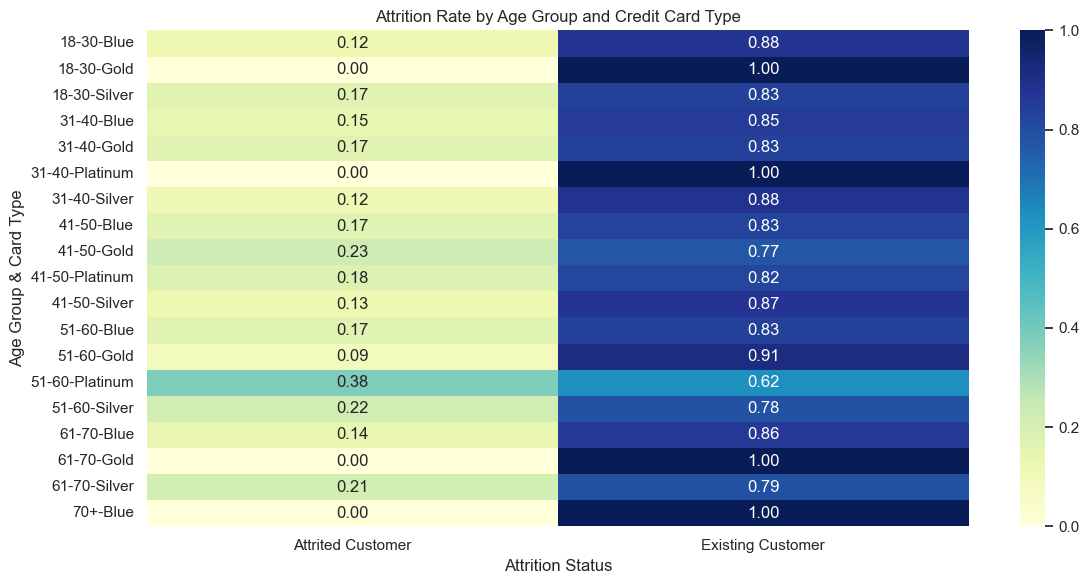

In [58]:
data['Age_Group'] = pd.cut(data['Customer_Age'], bins=[18, 30, 40, 50, 60, 70, 100],
                         labels=['18-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Step 2: Crosstab for heatmap
age_card_attrition = pd.crosstab(index=[data['Age_Group'], data['Card_Category']],
                                 columns=data['Attrition_Flag'], normalize='index')

# Step 3: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(age_card_attrition, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Attrition Rate by Age Group and Credit Card Type')
plt.ylabel('Age Group & Card Type')
plt.xlabel('Attrition Status')
plt.tight_layout()
plt.show()

51–60, Platinum:

Attrition: 38% (highest in the dataset)

Likely indicates dissatisfaction with premium services in this age group.

41–50, Gold:

Attrition: 23%

Noticeably higher than other age groups with Gold cards.

51–60, Silver:

Attrition: 22%

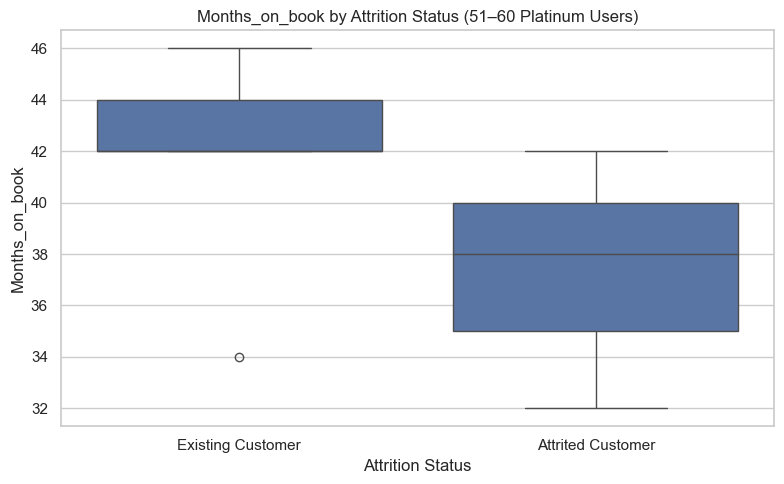

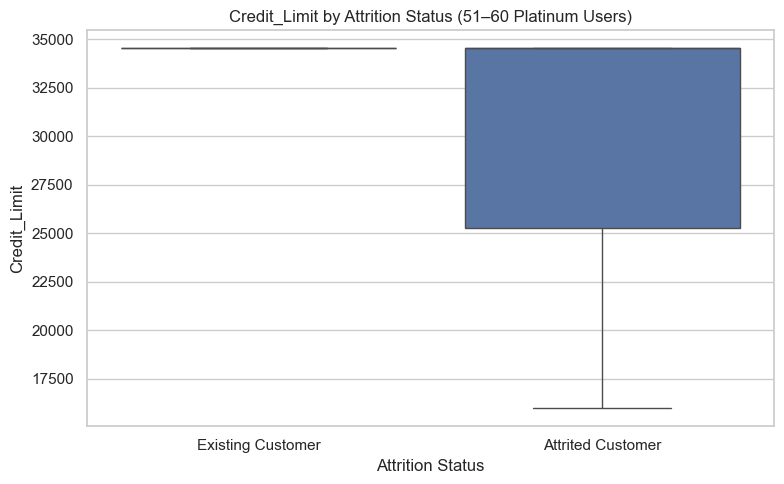

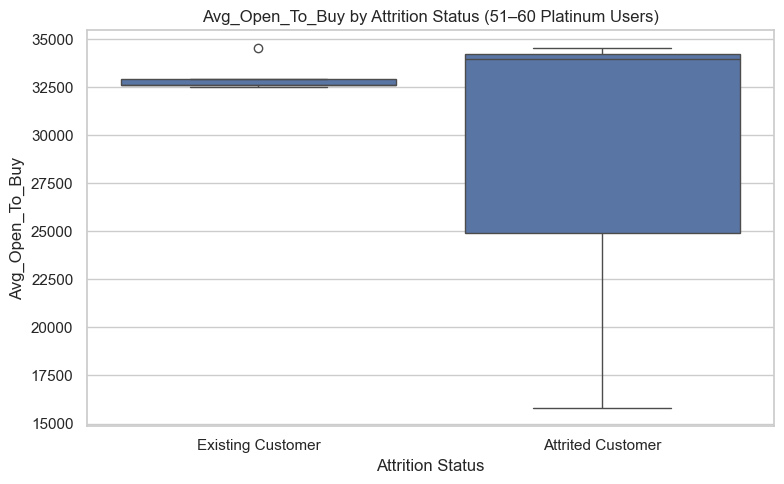

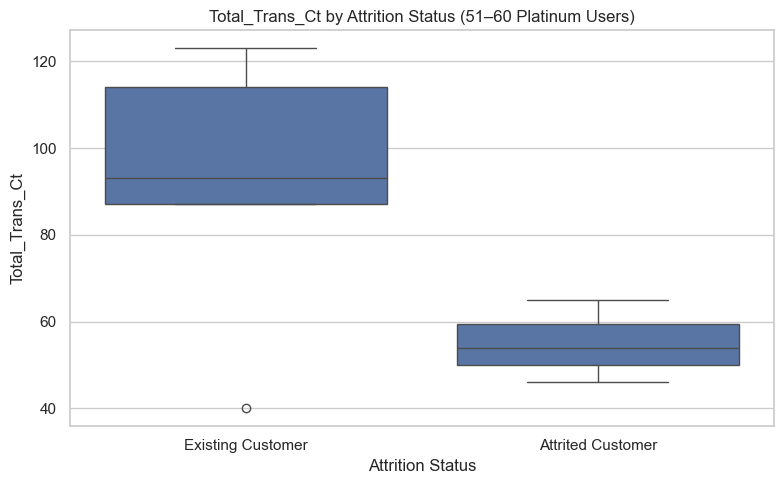

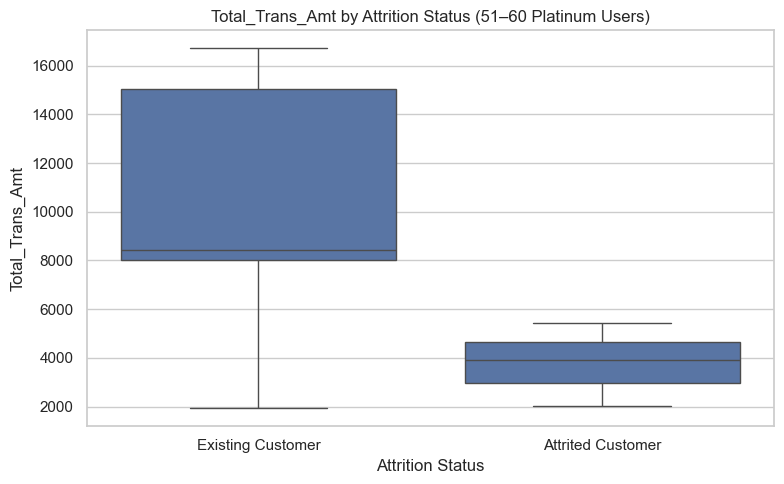

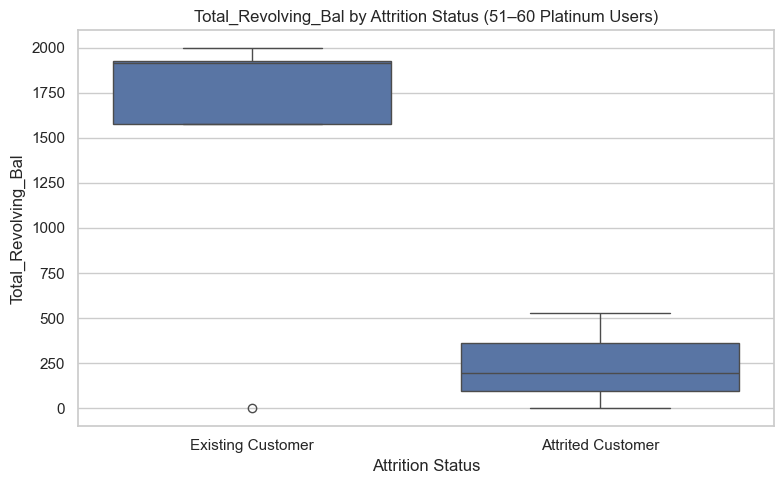

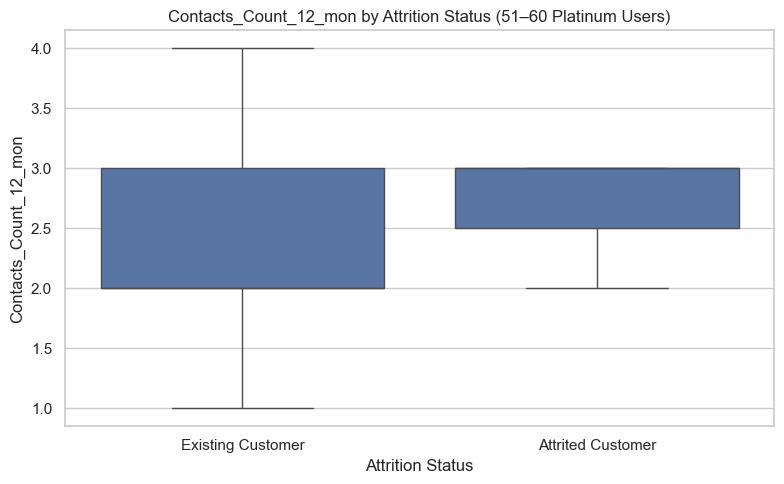

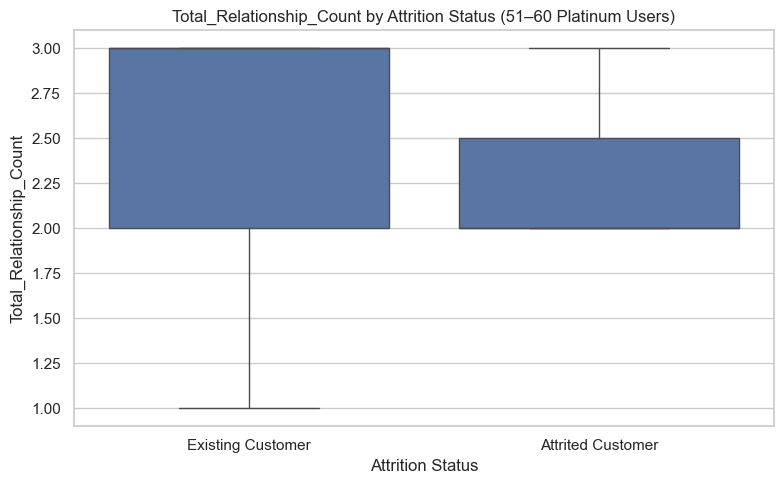

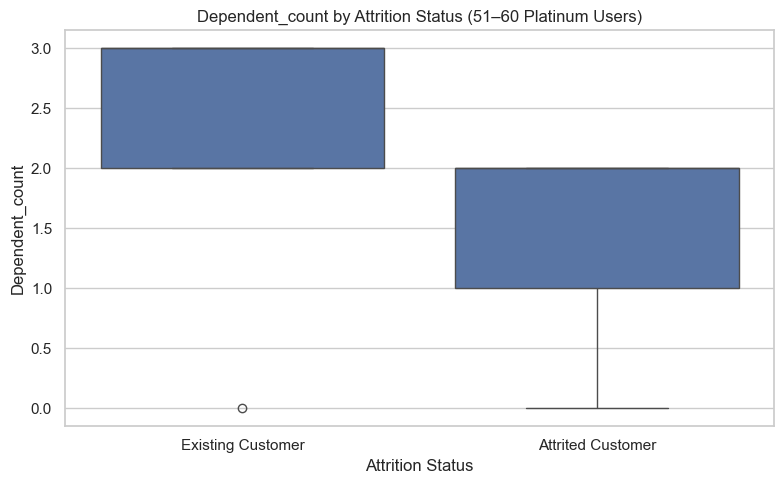

In [59]:
filtered_df = data[(data['Card_Category'] == 'Platinum') & 
                 (data['Customer_Age'].between(51, 60))]

# Step 2: Set up features to analyze
features = ['Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy',
            'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal',
            'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Dependent_count']

# Step 3: Plot boxplots comparing churned vs retained
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=filtered_df, x='Attrition_Flag', y=feature)
    plt.title(f'{feature} by Attrition Status (51–60 Platinum Users)')
    plt.xlabel('Attrition Status')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

Attrited customers have lower median tenure (around 38 months) but much greater variability, suggesting customers churn at various points in their lifecycle

Lower credit limits may be a potential driver of attrition even among premium (Platinum) cardholders aged 51–60.

Attrited customers had less available credit, suggesting they may have felt more constrained or underserved, especially compared to high-limit peers.

Existing Customers: Median around 90–100 transactions, with a broader range and more engagement.

Attrited Customers: Fewer transactions, with a median around 50–60.
Attrited users were significantly less active, possibly due to dissatisfaction, lower credit utilization, or unmet service expectations.

Attrited users spent less overall, reinforcing the pattern of lower engagement or financial trust with the service.

In [69]:
pio.renderers.default = 'browser'

In [70]:
import plotly.express as px

fig = px.scatter_3d(data, 
    x='Customer_Age', 
    y='Credit_Limit', 
    z='Attrition_Flag', 
    color='Attrition_Flag',
    title='3D View: Age vs Credit Limit vs Attrition',
    opacity=0.6,
    height=700
)
fig.show()

C:\Users\MANU\AppData\Local\Temp\ipykernel_22464\779443980.py:8: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



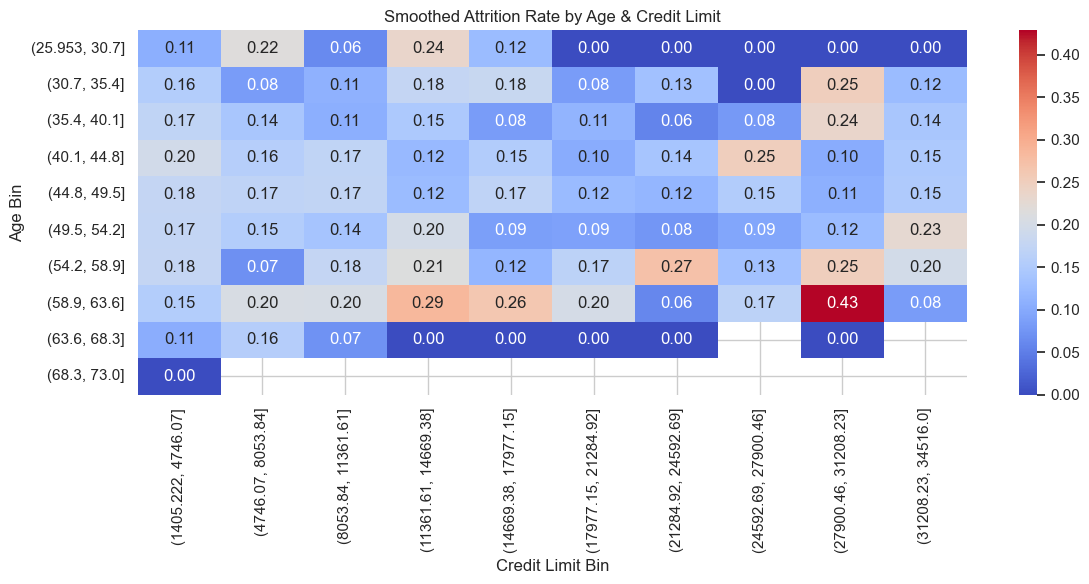

In [71]:
# Calculate mean attrition (1 if attrited, 0 if not)
data['Attrited'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Bin age and credit limit for smoothing
data['Age_Bin'] = pd.cut(data['Customer_Age'], bins=10)
data['Limit_Bin'] = pd.cut(data['Credit_Limit'], bins=10)

pivot = data.pivot_table(values='Attrited', index='Age_Bin', columns='Limit_Bin', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Smoothed Attrition Rate by Age & Credit Limit')
plt.xlabel('Credit Limit Bin')
plt.ylabel('Age Bin')
plt.tight_layout()
plt.show()


Ages 58.9–63.6 with Credit Limit ₹27,900–₹31,200 show the highest attrition rate of 0.43 (43%).

Ages 54.2–58.9 with Credit Limit ₹21,284–₹27,900 and ₹27,900–₹31,200 also have elevated attrition rates of 0.27 and 0.25, respectively.

Customers across all age groups with the highest credit limit (₹31,200–₹34,516) consistently show low or 0% attrition.

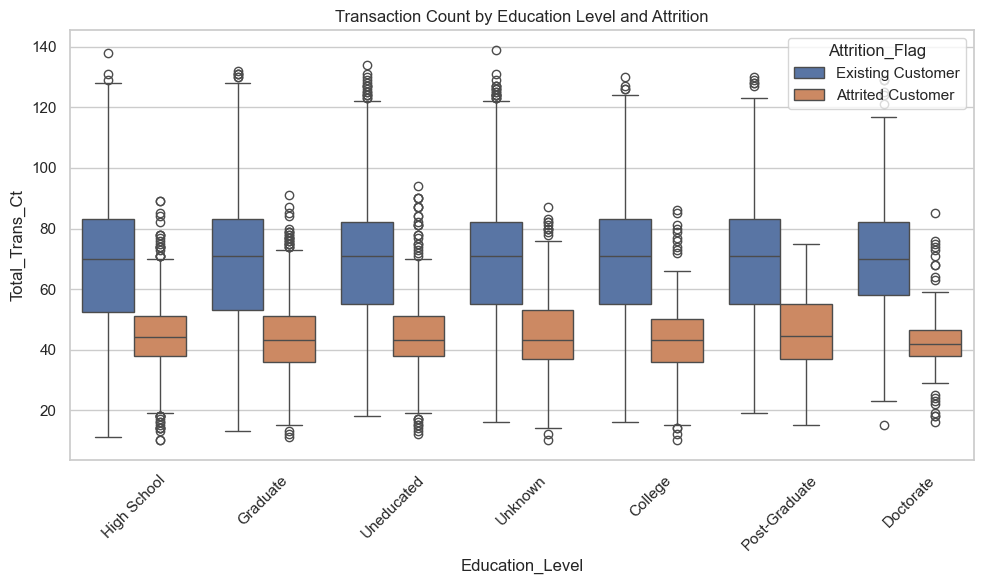

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Education_Level', y='Total_Trans_Ct', hue='Attrition_Flag')
plt.title('Transaction Count by Education Level and Attrition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Education level doesn't significantly affect transaction count within each attrition group.